# Multi-agent Simulations Plots
## Strong Project - UML

### Five Agents Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

#### Helper functions

In [2]:
def surface_plot(pivot, title, labels):
    fig = go.Figure(data=[go.Surface(
                            x=pivot.columns,
                            y=pivot.index,
                            z=np.array(pivot))])

    fig.update_layout(title=title, autosize=False,
                      width=900, height=900)

    fig.update_layout(scene = dict(
                        xaxis_title=labels[0],
                        yaxis_title=labels[1],
                        zaxis_title=labels[2]),
                     )
    fig.update_traces(showscale=False)
    fig.show()


def heatmap_plot(pivot):
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(pivot, cmap="RdBu", 
                     xticklabels=2, yticklabels=2)
    ax.invert_yaxis()

    
def all_but(cols_all, cols):
    return [col for col in cols_all if col not in cols]

#### Define constants

In [3]:
sim_database_path = "results/database_5.csv"
# sim_database_path = "results/database_2.csv"
net_database_path = "networks/5/network_database_5.csv"
# net_database_path = "networks/2/network_database_2.csv"
n_header_rows = 5

#### Read the simulations database for 5 agents, and merge it with the networks database

In [4]:
df_sim = pd.read_csv(sim_database_path, skiprows=n_header_rows)
df_net = pd.read_csv(net_database_path, skiprows=n_header_rows)
df = df_sim.merge(df_net, on="network_url")

#### Fix data types

In [5]:
int_cols = ["n_nodes", "n_edges"]
df[int_cols] = df[int_cols].astype(np.int64)

#### Display its info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890000 entries, 0 to 1889999
Data columns (total 41 columns):
 #   Column       Dtype  
---  ------       -----  
 0   env          int64  
 1   pi_0         float64
 2   pi_1         float64
 3   pi_2         float64
 4   pi_3         float64
 5   pi_4         float64
 6   algo_0       int64  
 7   algo_1       int64  
 8   algo_2       int64  
 9   algo_3       int64  
 10  algo_4       int64  
 11  fov_0        int64  
 12  fov_1        int64  
 13  fov_2        int64  
 14  fov_3        int64  
 15  fov_4        int64  
 16  period_0     int64  
 17  period_1     int64  
 18  period_2     int64  
 19  period_3     int64  
 20  period_4     int64  
 21  network_url  object 
 22  map_url      object 
 23  time         int64  
 24  n_nodes      int64  
 25  n_edges      int64  
 26  in_0         int64  
 27  in_1         int64  
 28  in_2         int64  
 29  in_3         int64  
 30  in_4         int64  
 31  out_0        int64  
 32

In [7]:
df.head()

env  pi_0  pi_1  pi_2  pi_3  pi_4  algo_0  algo_1  algo_2  algo_3  ...  \
0    0  0.27  0.12  0.24  0.10  0.21       0       0       0       0  ...   
1    0  0.35  0.63  0.70  0.15  0.35       0       0       0       0  ...   
2    0  0.09  0.11  0.14  0.14  0.09       0       0       0       0  ...   
3    0  0.80  0.63  0.43  0.54  0.46       0       0       0       0  ...   
4    0  0.23  0.42  0.29  0.26  0.34       0       0       0       0  ...   

   out_0  out_1  out_2  out_3  out_4  centr_0  centr_1  centr_2  centr_3  \
0      5      5      5      5      3      2.5      2.5     2.25     2.25   
1      5      5      5      5      3      2.5      2.5     2.25     2.25   
2      5      5      5      5      3      2.5      2.5     2.25     2.25   
3      5      5      5      5      3      2.5      2.5     2.25     2.25   
4      5      5      5      5      3      2.5      2.5     2.25     2.25   

   centr_4  
0      2.0  
1      2.0  
2      2.0  
3      2.0  
4      2.0  

[5 rows x 41 columns]

#### Since all nodes are identical, drop redundant columns and rename the renamining ones properly

In [8]:
cols_to_drop = [col for col in df.columns if (col.startswith("fov") or col.startswith("period") or col.startswith("algo")) and (not col.endswith("0"))]
df_sym = df.drop(cols_to_drop, axis=1)
df_sym = df_sym.rename(columns={"algo_0": "algo", "fov_0": "fov", "period_0": "period"})
df_sym.head()

env  pi_0  pi_1  pi_2  pi_3  pi_4  algo  fov  period  \
0    0  0.27  0.12  0.24  0.10  0.21     0    1       1   
1    0  0.35  0.63  0.70  0.15  0.35     0    1       1   
2    0  0.09  0.11  0.14  0.14  0.09     0    1       1   
3    0  0.80  0.63  0.43  0.54  0.46     0    1       1   
4    0  0.23  0.42  0.29  0.26  0.34     0    1       1   

              network_url  ... out_0  out_1  out_2  out_3  out_4  centr_0  \
0  networks/5/1048348.npy  ...     5      5      5      5      3      2.5   
1  networks/5/1048348.npy  ...     5      5      5      5      3      2.5   
2  networks/5/1048348.npy  ...     5      5      5      5      3      2.5   
3  networks/5/1048348.npy  ...     5      5      5      5      3      2.5   
4  networks/5/1048348.npy  ...     5      5      5      5      3      2.5   

   centr_1  centr_2  centr_3  centr_4  
0      2.5     2.25     2.25      2.0  
1      2.5     2.25     2.25      2.0  
2      2.5     2.25     2.25      2.0  
3      2.5     2.25     2.25      2.0  
4      2.5     2.25     2.25      2.0  

[5 rows x 29 columns]

In [9]:
df_sym.columns

Index(['env', 'pi_0', 'pi_1', 'pi_2', 'pi_3', 'pi_4', 'algo', 'fov', 'period',
       'network_url', 'map_url', 'time', 'n_nodes', 'n_edges', 'in_0', 'in_1',
       'in_2', 'in_3', 'in_4', 'out_0', 'out_1', 'out_2', 'out_3', 'out_4',
       'centr_0', 'centr_1', 'centr_2', 'centr_3', 'centr_4'],
      dtype='object')

In [10]:
# df["n_edges"].value_counts()

#### Effect of Increasing Network Density on Search Time at FOV = 1

In [11]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(x="n_edges", y="time", data=df_sym[df_sym["fov"] == 1])

#### Effect of Increasing Network Density on Search Time at FOV = 5

In [12]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(x="n_edges", y="time", data=df_sym[df_sym["fov"] == 5])

#### Effect of Increasing Network Density on Search Time at FOV = 40

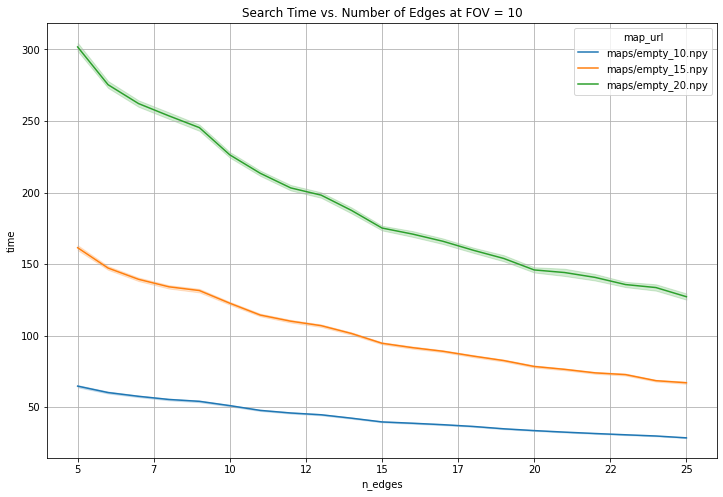

In [13]:
FOV = 10

from  matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12, 8))
plt.title(f"Search Time vs. Number of Edges at FOV = {FOV}")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.grid()

sns.lineplot(x="n_edges", y="time", data=df_sym[df_sym["fov"] == FOV], hue="map_url")
plt.show()

In [14]:
df_sym = df_sym.set_index("map_url")

In [15]:
df_sym_ave_10 = df_sym.loc["maps/empty_10.npy"].groupby(all_but(df_sym.columns, ["pi_0", "pi_1", "pi_2", "pi_3", "pi_4", "time"])).mean().reset_index()
df_sym_ave_15 = df_sym.loc["maps/empty_15.npy"].groupby(all_but(df_sym.columns, ["pi_0", "pi_1", "pi_2", "pi_3", "pi_4", "time"])).mean().reset_index()
df_sym_ave_20 = df_sym.loc["maps/empty_20.npy"].groupby(all_but(df_sym.columns, ["pi_0", "pi_1", "pi_2", "pi_3", "pi_4", "time"])).mean().reset_index()

In [16]:
df_plot_ave = df_sym_ave_20

In [17]:
# df_sym_ave.info()

In [18]:
df_plot_ave.head()

env  algo  fov  period             network_url  n_nodes  n_edges  in_0  \
0    0     0    1       1        networks/5/0.npy        5        5     1   
1    0     0    1       1        networks/5/1.npy        5        6     1   
2    0     0    1       1  networks/5/1026862.npy        5       20     4   
3    0     0    1       1  networks/5/1042365.npy        5       21     4   
4    0     0    1       1  networks/5/1047209.npy        5       22     5   

   in_1  in_2  ...  centr_1  centr_2  centr_3  centr_4     pi_0     pi_1  \
0     1     1  ...     0.50     0.50     0.50     0.50  0.20030  0.20030   
1     2     1  ...     0.75     0.50     0.50     0.50  0.19629  0.21139   
2     4     4  ...     2.25     2.25     2.00     1.25  0.17824  0.17805   
3     4     4  ...     2.25     2.25     2.25     1.50  0.17450  0.17595   
4     4     4  ...     2.25     2.25     2.25     1.75  0.17738  0.17451   

      pi_2     pi_3     pi_4     time  
0  0.20098  0.20440  0.19932  427.472  
1  0.19790  0.19483  0.19225  436.952  
2  0.17668  0.17886  0.17731  540.400  
3  0.17393  0.17982  0.18596  541.164  
4  0.17465  0.17570  0.18528  548.559  

[5 rows x 28 columns]

#### Plot a search time average heatmap for network density vs. FOV 

In [19]:
pivot_ave = df_plot_ave.pivot("n_edges", "fov", "time")

In [20]:
pivot_ave.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40],
           dtype='int64', name='fov')

In [21]:
# pivot_ave = pivot_ave / np.amax(np.array(pivot_ave))
surface_plot(pivot_ave, "Team Performance Analysis", ["FOV", "Number of Edges", "Search Time"])

#### Plot a search time std heatmap for network density vs. FOV 

In [22]:
df_sym_std_10 = df_sym.loc["maps/empty_10.npy"].groupby(all_but(df_sym.columns, ["pi_0", "pi_1", "pi_2", "pi_3", "pi_4", "time"])).std().reset_index()
df_sym_std_15 = df_sym.loc["maps/empty_15.npy"].groupby(all_but(df_sym.columns, ["pi_0", "pi_1", "pi_2", "pi_3", "pi_4", "time"])).std().reset_index()
df_sym_std_20 = df_sym.loc["maps/empty_20.npy"].groupby(all_but(df_sym.columns, ["pi_0", "pi_1", "pi_2", "pi_3", "pi_4", "time"])).std().reset_index()

In [23]:
df_plot_std = df_sym_std_20

In [24]:
pivot_std = df_plot_std.pivot("n_edges", "fov", "time")
surface_plot(pivot_std, "Team Performance STD Analysis", ["FOV", "Number of Edges", "Search Time STD"])

In [25]:
# pivot_pi = df_plot_ave.pivot("n_edges", "fov", "pi_0")
# surface_plot(pivot_pi, "Individual Performance Analysis", ["FOV", "Number of Edges", "pi_0"])